In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
Signal1 = pd.read_csv("signal1.csv",header=None)
Signal2 = pd.read_csv("signal2.csv",header=None)
Signal3 = pd.read_csv("signal3.csv",header=None)
Signal4 = pd.read_csv("signal4.csv",header=None)
Signal5 = pd.read_csv("signal5.csv",header=None)
Signal6 = pd.read_csv("signal6.csv",header=None)
Dataframe = pd.concat([Signal1,Signal2,Signal3,Signal4,Signal5,Signal6],axis=1,ignore_index=True)

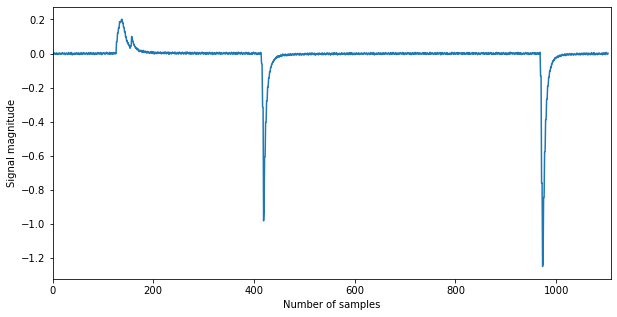

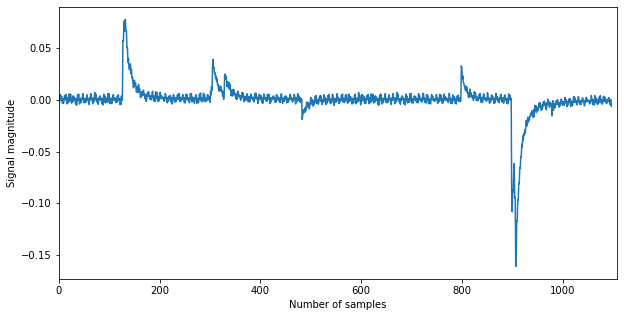

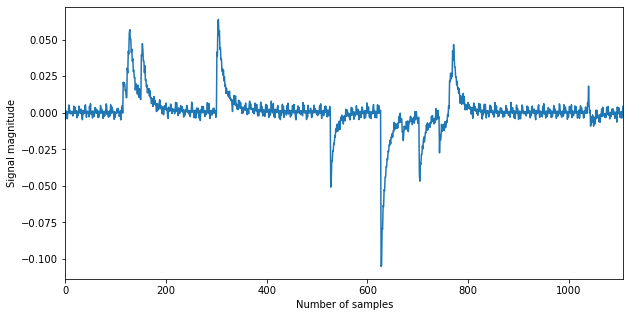

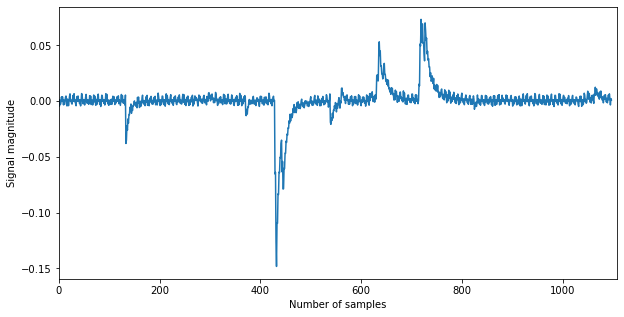

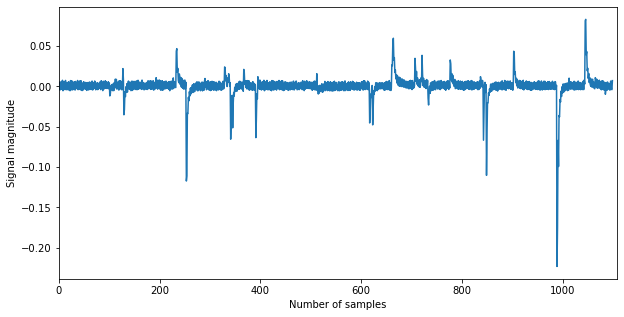

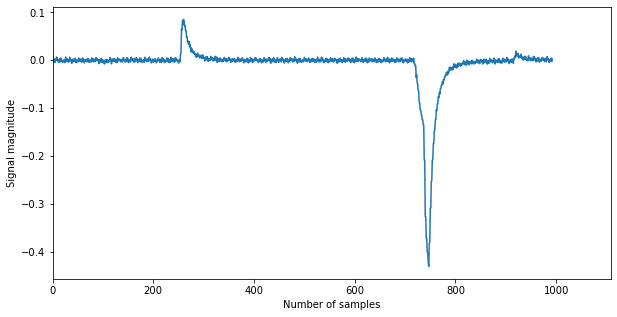

In [3]:
figs = {}
axs = {}
for i in range(Dataframe.shape[1]):
    figs[i] = plt.figure(figsize=(10,5))
    axs[i] =figs[i].add_subplot(111)
    axs[i].plot(Dataframe[i])  
    axs[i].set_xlim(0,Dataframe[i].shape[0])
    axs[i].set_ylabel('Signal magnitude')
    axs[i].set_xlabel('Number of samples')   

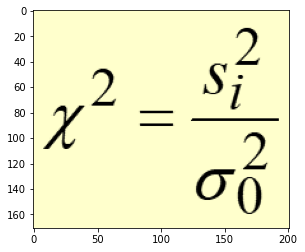

In [4]:
image = mpimg.imread("varianceformula.png")
plt.imshow(image)
plt.show()

In [ ]:
def variance_fault_detection(signal,threshold,window_size):
    X = signal[:60]
    variance_flux0 = np.var(X)
    decision_var = []
    variance_comparison = []
    time = []
    for window in range(window_size,signal.shape[0]+1):
        u = (np.std(signal[window-20:window])**2)/variance_flux0
        variance_comparison.append(u)
    